In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
def setResistance(n, x_max, g_min, g_max, w_max): 
    Rf = float((x_max*w_max)/(g_max-g_min))
    print("Rf is : "+str(Rf))
    return Rf

In [3]:
def getWeights(n):
    g=[]
    for i in range(n):
        temp = float(int(rand.random()*4))
        #print("Weight of the memristor number "+str(i+1)+" is: "+str(temp))
        g.append(temp)
    return g

In [4]:
def testInputs(n,k,testNum):
    x=[]
    for i in range(n*testNum):
        x.append(int(rand.random()*pow(2,k)))
    x=np.array(x).reshape((n,testNum))
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1,x2,x3,x4

In [5]:
def calc_expected_output(weights, x1, x2, x3, x4):
    out=[]
    for i in range(len(x1)):
        out.append(weights[0]*x1[i] + weights[1]*x2[i] + weights[2]*x3[i] + weights[3]*x4[i])
    return out

In [6]:
def calc_avg_error(output, expected):
    error_list=[]
    error=float(0)
    for i in range(len(output)):
        err=abs(output[i] - expected[i])
        error += err
        error_list.append(err)
    avg_error = error/len(output)
    return error_list,avg_error

In [7]:
def calc_avg_expected(expected):
    acc=float(0)
    for i in (expected):
        acc+=i
    acc=acc/len(expected)
    return acc

In [8]:
def show(signal,numOfCases, color, title):
    time=np.arange(numOfCases)
    plt.step(time,signal,color)
    plt.title(title)
    plt.show()

In [9]:
def crossbarModule(n, x_max, w_max, g_min, g_max, Rf, weights, x1_test, x2_test, x3_test, x4_test):
    G=[]
    v1=[]
    v2=[]
    v3=[]
    v4=[]
    neuron_out=[]
    
    for i in weights:
        G.append(i*(g_max - g_min)/w_max + g_min)
        
    for i in range(len(x1_test)):
        v1.append(float(x1_test[i]/x_max))
        v2.append(float(x2_test[i]/x_max))
        v3.append(float(x3_test[i]/x_max))
        v4.append(float(x4_test[i]/x_max))
    
    for i in range(len(v1)):
        I_SL=v1[i]*G[0] + v2[i]*G[1] + v3[i]*G[2] + v4[i]*G[3]
        neuron_out.append(I_SL*Rf)
        
    return  neuron_out

In [10]:
Rmax = float(input("What is the maximum resistance of the memristor? "))
g_min = 1/Rmax

Rmin = float(input("What is the minimum resistance of the memristor? "))
g_max = 1/Rmin

n = int(input("How many rows does the crossbar have? "))

k = int(input("What is the data width of the input values? "))
x_max=pow(2,k)-1

kw = float(input("How many resistance states does each memristor have? "))

w_max = float(kw-1)

Rf = setResistance(n, x_max, g_min, g_max, w_max)


What is the maximum resistance of the memristor? 50e3
What is the minimum resistance of the memristor? 10e3
How many rows does the crossbar have? 4
What is the data width of the input values? 2
How many resistance states does each memristor have? 4
Rf is : 112499.99999999999


In [11]:
numOfModules = int(input("How many random modules? "))
numOfTestCases = int(input("How many test cases for each module? "))
overall_avg_error = float(0)
overall_avg_expected = float(0)
for i in range(numOfModules):
    weights=getWeights(n)
    x1,x2,x3,x4=testInputs(n,k,numOfTestCases)
    output = crossbarModule(n, x_max, w_max, g_min, g_max, Rf, weights, x1, x2, x3, x4)
    expected_output = calc_expected_output(weights, x1, x2, x3, x4)
    error_list,avg_error=calc_avg_error(output, expected_output)
    avg_expected_output=calc_avg_expected(expected_output)
    overall_avg_error+=avg_error
    overall_avg_expected+=avg_expected_output
overall_avg_error = overall_avg_error/numOfModules
overall_avg_expected = overall_avg_expected/numOfModules
print("Overall average error is: "+str(overall_avg_error)+" Volts")
print("Overall average expected output is: "+ str(overall_avg_expected)+" Volts")
print("Overall accuracy is: "+str((1-overall_avg_error/overall_avg_expected)*100)+"%")

How many random modules? 1000
How many test cases for each module? 1000
Overall average error is: 4.50055425 Volts
Overall average expected output is: 8.982657000000005 Volts
Overall accuracy is: 49.89729375172627%


In [12]:
output = crossbarModule(n, x_max, w_max, g_min, g_max, Rf, weights, x1, x2, x3, x4)
expected_output = calc_expected_output(weights, x1, x2, x3, x4)
error_list,avg_error=calc_avg_error(output, expected_output)
avg_expected_output=calc_avg_expected(expected_output)

In [13]:
print("Average error of the last module is:" + str(avg_error)+" Volts")
print("Average expected output voltages of the last module is: "+str(avg_expected_output)+ " Volts")
print("Accuracy percentage of the last module is: "+str((1-avg_error/avg_expected_output)*100)+"%")

Average error of the last module is:4.4865 Volts
Average expected output voltages of the last module is: 5.981 Volts
Accuracy percentage of the last module is: 24.987460290921238%


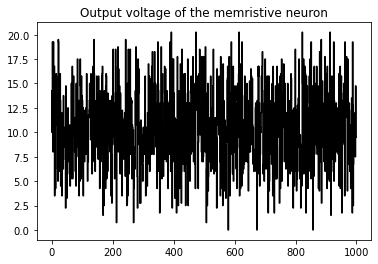

In [14]:
show(output,numOfTestCases,'k','Output voltage of the memristive neuron')

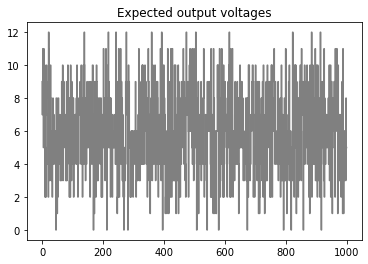

In [15]:
show(expected_output,numOfTestCases,'gray','Expected output voltages')

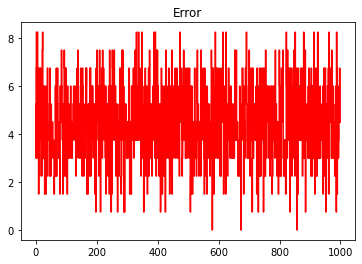

In [16]:
show(error_list,numOfTestCases,'red','Error')